# Visão Computacional e Deep Learning para Sensoriamento Remoto com Python


# Capítulo 18 - Detecção de Objetos

## Introdução a Detecção de Objetos

A detecção de objetos é uma técnica de visão computacional para localizar instâncias de objetos em imagens ou vídeos. Os algoritmos de detecção de objetos normalmente aproveitam o aprendizado de máquina ou o aprendizado profundo para produzir resultados significativos. Quando os humanos olham para imagens ou vídeos, podemos reconhecer e localizar objetos de interesse em questão de momentos. O objetivo da detecção de objetos é replicar essa inteligência usando um computador.

image.png

## Classificação de Imagens X Detecção de Objetos

A detecção de objetos é comumente confundida com o reconhecimento de imagem, portanto, antes de prosseguirmos, é importante esclarecer as distinções entre eles.

O reconhecimento de imagem atribui um rótulo a uma imagem. A foto de um cachorro recebe o rótulo de “cachorro”. Uma foto de dois cachorros, ainda recebe o rótulo de “cachorro”. A detecção de objetos, por outro lado, desenha uma caixa ao redor de cada cachorro e rotula a caixa como “cachorro”. O modelo prevê onde cada objeto está e qual rótulo deve ser aplicado. Dessa forma, a detecção de objetos fornece mais informações sobre uma imagem do que o reconhecimento.

Aqui está um exemplo de como essa distinção se parece na prática:

image.png

## Estrutura básica

A detecção de objetos localiza a presença de um objeto em uma imagem e desenha uma caixa delimitadora em torno desse objeto. Isso geralmente envolve dois processos; classificando e tipo de objeto e, em seguida, desenhando uma caixa em torno desse objeto. Já cobrimos a classificação de imagens antes, então vamos agora revisar algumas das arquiteturas de modelo comuns usadas para detecção de objetos:

- R-CNN
- Fast R-CNN
- Faster R-CNN
- SSD (Single Shot MultiBox Defender)
- YOLO (You Only Look Once)

## Tipos de arquiteturas

Se você criar um detector de objetos personalizado ou usar um pré-treinado, precisará decidir que tipo de rede de detecção de objetos deseja usar: uma rede de Two Stage ou uma rede de Single Shot.

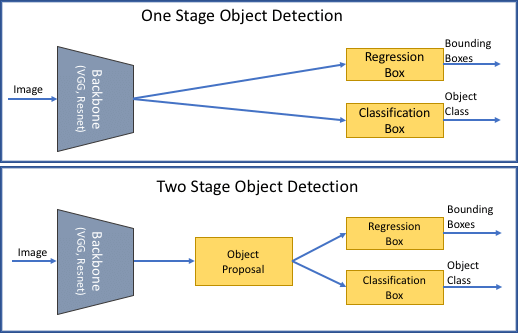

Two-Stage Networks

O estágio inicial de redes de dois estágios, como R-CNN e suas variantes, identifica propostas de regiões ou subconjuntos da imagem que podem conter um objeto. A segunda etapa classifica os objetos dentro das regiões propostas. Redes de dois estágios podem alcançar resultados de detecção de objetos muito precisos; no entanto, elas são tipicamente mais lentas do que as redes de estágio único.

Single-Stage Networks

Em redes de estágio único, como YOLO v2, a CNN produz previsões de rede para regiões em toda a imagem usando caixas de âncora, e as previsões são decodificadas para gerar as caixas delimitadoras finais para os objetos. As redes de estágio único podem ser muito mais rápidas do que as redes de dois estágios, mas podem não atingir o mesmo nível de precisão, especialmente para cenas que contêm objetos pequenos.

## Arquiteturas Two-Stage

### R-CNN

O artigo de 2014 propõe a versão basica do algoritmo de detecção de dois estágios baseado em CNN, que é aprimorado e acelerado nos artigos seguintes. Conforme descrito na figura acima, o pipeline geral é composto por três etapas:
Gerar propostas de região: o modelo deve desenhar candidatos de objetos na imagem, independente da categoria.
O segundo estágio é uma rede neural totalmente convolucional que calcula recursos de cada região candidata.
O estágio final é uma camada totalmente conectada, expressa como SVMs no artigo.

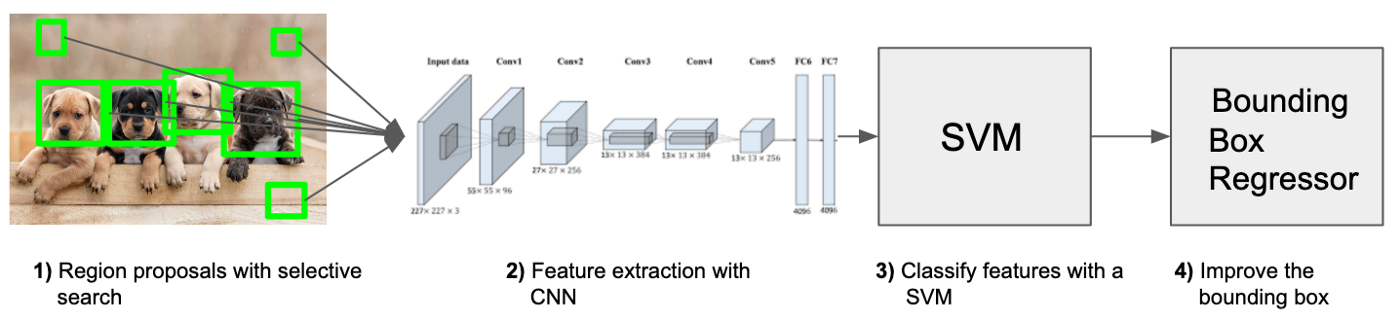

O problema que o sistema R-CNN tenta resolver é localizar objetos em uma imagem (detecção de objetos). O que você faz para resolver isso? Você pode começar com uma abordagem de janela deslizante. Ao usar este método, basta percorrer toda a imagem com retângulos de tamanhos diferentes e observar essas imagens menores em um método de força bruta. O problema é que você terá um número gigantesco de imagens menores para olhar. Para nossa sorte, outras pessoas inteligentes desenvolveram algoritmos para escolher de forma inteligente as chamadas propostas de regiões. Para simplificar este conceito:

- As propostas de região são apenas partes menores da imagem original, que achamos que podem conter os objetos que estamos procurando.

#### Propostas de região

Existem diferentes algoritmos de proposta de região que podemos escolher. Estes são algoritmos “normais” que funcionam fora da caixa. Não precisamos treiná-los nem nada. No caso deste trabalho, eles usam o método de busca seletiva para gerar propostas de regiões.


O algoritmo de busca seletiva usa busca exaustiva, mas ao invés de usar apenas ela também trabalha com a segmentação das cores apresentadas na imagem. Mais formalmente podemos dizer que a busca seletiva é um método que separa objetos de uma imagem fornecendo cores diferentes ao objeto.

Isso criará quase 2.000 regiões diferentes que teremos que examinar. Isso parece um número grande, mas ainda é muito pequeno em comparação com a abordagem de janela deslizante de força bruta.

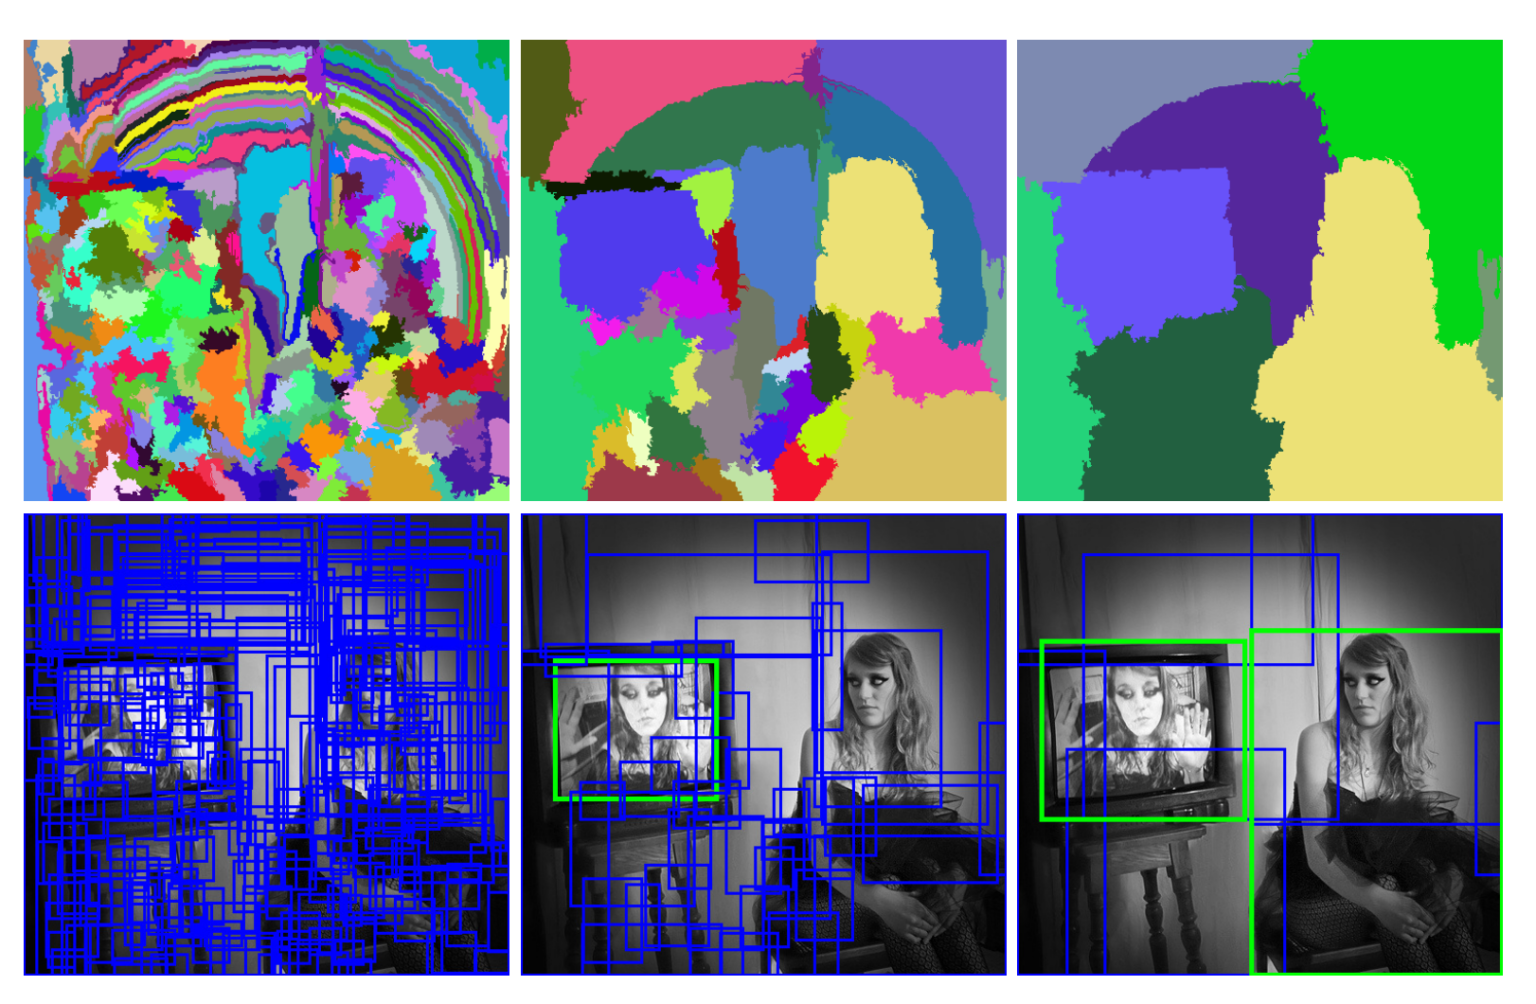

#### CNN

Na próxima etapa, pegamos cada proposta de região e criaremos um vetor de recursos representando essa imagem em uma dimensão muito menor usando uma Rede Neural Convolucional (CNN).

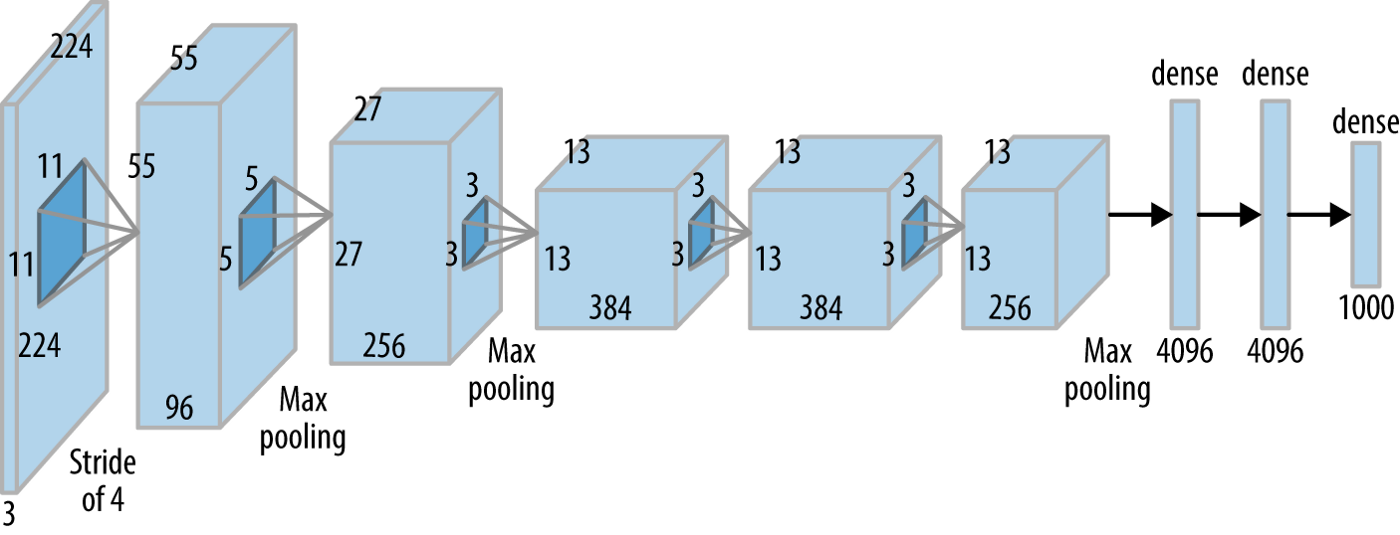

Eles usam o AlexNet como um extrator de recursos. Não se esqueça que estamos em 2014 e o AlexNet ainda é o que há de mais moderno.

Uma pergunta que precisamos responder:

Se você usa o AlexNet apenas como um extrator de recursos, como treinamos isso?

Bem, esta é uma questão fundamental com este sistema R-CNN. Você não pode treinar todo o sistema de uma só vez (isso será resolvido pelo rápido sistema R-CNN). Em vez disso, você precisará treinar cada parte de forma independente. Isso significa que o AlexNet foi treinado anteriormente em uma tarefa de classificação. Após o treinamento, eles removeram a última camada softmax. Agora, a última camada é a de 4096 dimensões totalmente conectada. Isso significa que nossos recursos são 4096 dimensionais.

Outra coisa importante a ter em mente é que a entrada para o AlexNet é sempre a mesma (227, 227, 3). No entanto, as propostas de imagens têm formatos diferentes. Muitos deles são menores ou maiores do que o tamanho necessário. Portanto, precisaremos redimensionar cada proposta de região.

Para resumir a tarefa da CNN:

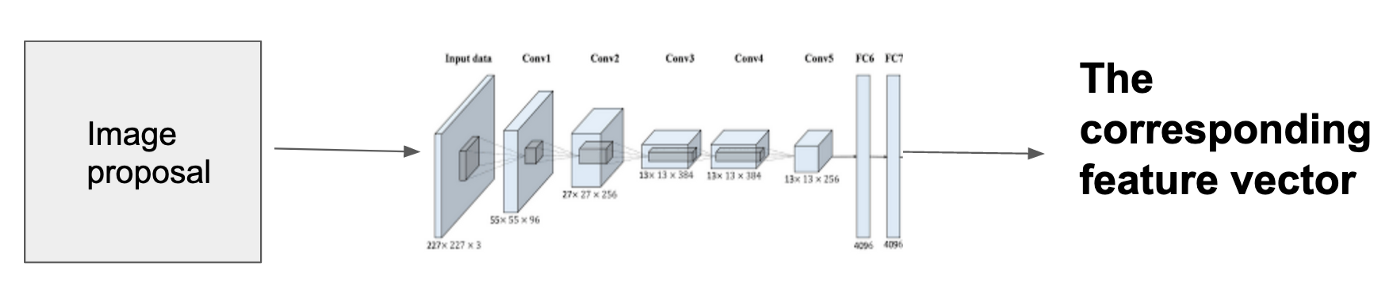

#### SVM

Criamos vetores de características a partir das propostas de imagens. Agora precisaremos classificar esses vetores de recursos. Queremos detectar qual classe de objeto esses vetores de recursos representam. Para isso, utilizamos um classificador SVM. Temos um SVM para cada classe de objeto e usamos todos eles. Isso significa que para um vetor de características temos n saídas, onde n é o número de objetos diferentes que queremos detectar. A saída é uma pontuação de confiança. Quão confiantes estamos de que esse vetor de recursos em particular representa essa classe.

O que me confundiu quando li este artigo pela primeira vez foi como treinamos esses diferentes SVMs. Bem, nós os treinamos em vetores de recursos criados pelo AlexNet. Isso significa que temos que esperar até que tenhamos treinado completamente a CNN antes de podermos treinar o SVM. O treinamento não é paralelizável. Como sabemos ao treinar qual vetor de recursos representava qual classe, podemos treinar facilmente os diferentes SVMs de maneira supervisionada.

Para resumir:
- Criamos diferentes propostas de imagens a partir de uma imagem.
- Em seguida, criamos um vetor de recursos a partir dessas propostas usando a CNN.
- No final, classificamos cada vetor de recursos com os SVMs para cada classe de objeto.

A saída:

Agora temos propostas de imagens que são classificadas em cada classe de objeto. Como os trazemos todos de volta à imagem? Usamos algo chamado supressão gananciosa não máxima. Esta é uma palavra chique para o seguinte conceito:

Rejeitamos uma região (proposta de imagem) se ela tiver uma sobreposição de interseção sobre união (IoU) com uma região selecionada com pontuação mais alta.

Combinamos cada região se houver sobreposição pegamos a proposta com maior pontuação (calculada pelo SVM). Fazemos esta etapa para cada classe de objeto independentemente. Depois disso, mantemos apenas as regiões com pontuação superior a 0,5.

#### Bounding Box Regressor (optional)

Quero mencionar o Regressor da caixa delimitadora no final porque não é um bloco de construção fundamental do sistema R-CNN. É uma ótima ideia e os autores descobriram que melhora a precisão média em 3%. Então, como isso funciona?

Quando você está treinando o Regressor da caixa delimitadora, sua entrada é o centro, a largura e a altura em pixels da proposta de região e o rótulo é a caixa delimitadora da verdade do solo. O objetivo, conforme declarado no documento, é:

Nosso objetivo é aprender uma transformação que mapeia uma caixa P proposta para uma caixa de verdade G.

#### Problemas com a R-CNN

- Ainda leva muito tempo para treinar a rede, pois você teria que classificar 2.000 propostas de região por imagem.
- Não pode ser implementado em tempo real, pois leva cerca de 47 segundos para cada imagem de teste.
- O algoritmo de busca seletiva é um algoritmo fixo. Portanto, nenhum aprendizado está acontecendo nesse estágio. Isso pode levar à geração de propostas de regiões candidatas ruins.

### Fast R-CNN

O mesmo autor do artigo anterior (R-CNN) resolveu algumas das desvantagens do R-CNN para construir um algoritmo de detecção de objetos mais rápido e foi chamado de Fast R-CNN. A abordagem é semelhante ao algoritmo R-CNN. Mas, em vez de alimentar as propostas de região para a CNN, alimentamos a imagem de entrada para a CNN para gerar um mapa de recursos convolucional. A partir do mapa de recursos convolucionais, identificamos a região das propostas e as distorcemos em quadrados e, usando uma camada de pooling RoI, remodelamos-as em um tamanho fixo para que possam ser alimentadas em uma camada totalmente conectada. A partir do vetor de recursos RoI, usamos uma camada softmax para prever a classe da região proposta e também os valores de deslocamento para a caixa delimitadora.

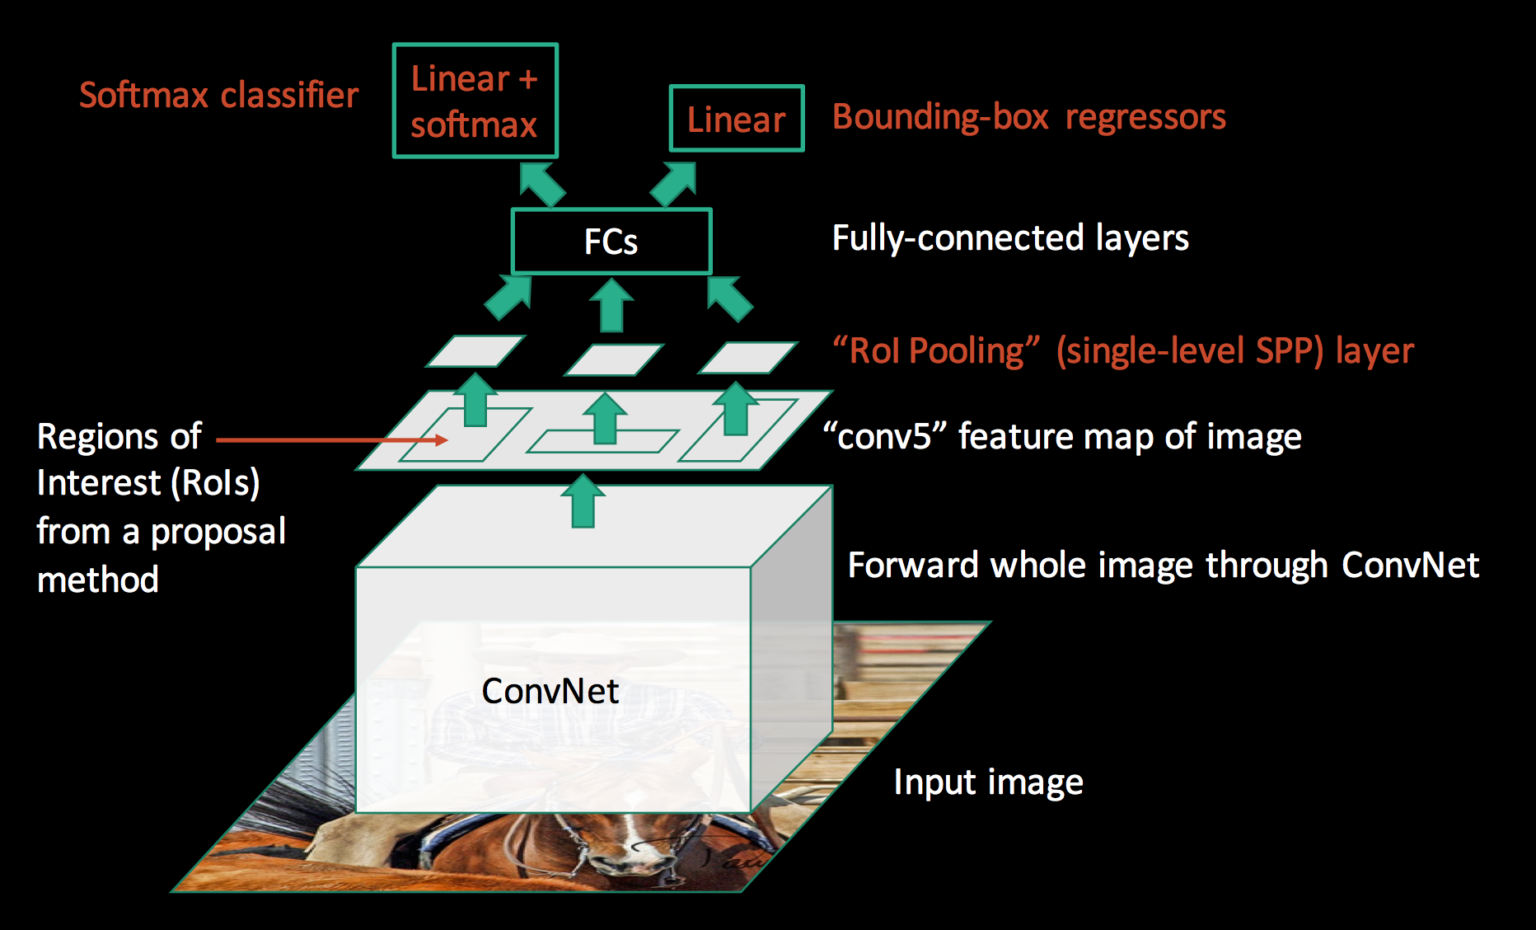

Aqui está um resumo das principais contribuições:

- Propôs uma nova camada chamada ROI Pooling que extrai vetores de recursos de comprimento igual de todas as propostas (ou seja, ROIs) na mesma imagem.
- Comparado ao R-CNN, que possui vários estágios (geração de proposta de região, extração de recursos e classificação usando SVM), o Faster R-CNN constrói uma rede que possui apenas um único estágio.
- O R-CNN mais rápido compartilha cálculos (ou seja, cálculos de camada convolucional) em todas as propostas (ou seja, ROIs) em vez de fazer os cálculos para cada proposta de forma independente. Isso é feito usando a nova camada ROI Pooling, que torna o Fast R-CNN mais rápido que o R-CNN.
- O Fast R-CNN não armazena em cache os recursos extraídos e, portanto, não precisa de muito armazenamento em disco em comparação com o R-CNN, que precisa de centenas de gigabytes.
- Fast R-CNN é mais preciso do que R-CNN.

###Faster R-CNN

Ambos os algoritmos acima (R-CNN e Fast R-CNN) usam busca seletiva para descobrir as propostas de região. A busca seletiva é um processo lento e demorado que afeta o desempenho da rede. Portanto, Shaoqing Ren et al. surgiu com um algoritmo de detecção de objetos que elimina o algoritmo de busca seletiva e permite que a rede aprenda as propostas de região.

Semelhante ao Fast R-CNN, a imagem é fornecida como uma entrada para uma rede convolucional que fornece um mapa de recursos convolucional. Em vez de usar o algoritmo de busca seletiva no mapa de recursos para identificar as propostas de região, uma rede separada é usada para prever as propostas de região. As propostas de regiões previstas são então remodeladas usando uma camada de agrupamento RoI que é usada para classificar a imagem dentro da região proposta e prever os valores de deslocamento para as caixas delimitadoras.

As principais contribuições da Faster R-CNN:

- Rede de proposta de região proposta (RPN), que é uma rede totalmente convolucional que gera propostas com várias escalas e proporções. O RPN implementa a terminologia da rede neural com atenção para informar à detecção de objetos (Fast R-CNN) onde procurar.
- Em vez de usar pirâmides de imagens (ou seja, várias instâncias da imagem, mas em diferentes escalas) ou pirâmides de filtros (ou seja, vários filtros com tamanhos diferentes), este artigo introduziu o conceito de caixas de âncora. Uma caixa de âncora é uma caixa de referência de uma escala e proporção específicas. Com várias caixas de âncora de referência, várias escalas e proporções existem para uma única região. Isso pode ser pensado como uma pirâmide de caixas de âncora de referência. Cada região é então mapeada para cada caixa de âncora de referência, detectando assim objetos em diferentes escalas e proporções.
- Os cálculos convolucionais são compartilhados entre o RPN e o Fast R-CNN. Isso reduz o tempo computacional.

A arquitetura do Faster R-CNN é mostrada na próxima figura. É composto por 2 módulos:

- RPN: Para geração de propostas de regiões.
- Fast R-CNN: Para detectar objetos nas regiões propostas.

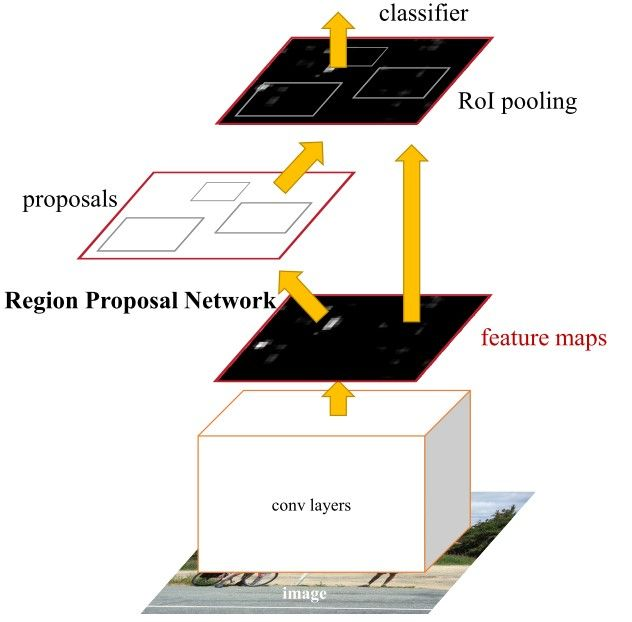

#### Rede de Propostas Regionais (RPN)

Os modelos R-CNN e Fast R-CNN dependem do algoritmo Selective Search para geração de propostas de regiões. Cada proposta é alimentada a uma CNN pré-treinada para classificação. Este artigo propôs uma rede chamada rede de proposta de região (RPN) que pode produzir as propostas de região. Isso tem algumas vantagens:

- As propostas de região agora são geradas usando uma rede que pode ser treinada e customizada de acordo com a tarefa de detecção.
- Como as propostas são geradas usando uma rede, esta pode ser treinada de ponta a ponta para ser personalizada na tarefa de detecção. Assim, produz melhores propostas de regiões em comparação com métodos genéricos como Selective Search e EdgeBoxes.
- O RPN processa a imagem usando as mesmas camadas convolucionais usadas na rede de detecção Fast R-CNN. Assim, o RPN não leva tempo extra para produzir as propostas em comparação com algoritmos como a Busca Seletiva.
- Devido ao compartilhamento das mesmas camadas convolucionais, o RPN e o Fast R-CNN podem ser mesclados/unificados em uma única rede. Assim, o treinamento é feito apenas uma vez.

O RPN funciona no mapa de recursos de saída retornado da última camada convolucional compartilhada com o Fast R-CNN. Isso é mostrado na próxima figura. Com base em uma janela retangular de tamanho nxn, uma janela deslizante passa pelo mapa de recursos. Para cada janela, várias propostas de regiões candidatas são geradas. Essas propostas não são as propostas finais, pois serão filtradas com base em sua "pontuação de objetividade"

#Estudo de Caso 04 - Detecção de Painéis solares em imagens de alta resolução usando a Faster RCNN

Neste exemplo vamos usar a implementação do Pytorch da FasterRCNN para detectar painéis solares em imagens de satélite de alta resolução.

Primeiro, vamos nos conectar com o Drive:

In [ ]:
from google.colab import drive
GDRIVE_ROOT = "/gdrive"
drive.mount(GDRIVE_ROOT)

Mounted at /gdrive


Vamos importar os pacotes necessários:

In [ ]:
from PIL import Image
import os
import glob
import random
import csv
random.seed(4)

import pandas as pd
import numpy as np
import tqdm
import xml.etree.ElementTree as ET
import pandas as pd
from skimage import io
from skimage.io import imsave
import matplotlib.pyplot as plt
import cv2

import torch
from torch.utils.data import DataLoader, Dataset

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import torchvision.transforms as transforms

Vamos definir os caminhos das imagens e anotações que serão utilizadas neste estudo:

In [ ]:
path_to_images =  os.path.join(GDRIVE_ROOT + '/My Drive/', 'Datasets/dataset_solar/images/')
path_to_annotations = os.path.join(GDRIVE_ROOT + '/My Drive/', 'Datasets/dataset_solar/annotations/')

Criamos o caminho do arquivo .csv onde iremos salvar as anotações logo mais.

In [ ]:
annotations_file_path = os.path.join(path_to_annotations, 'annotations.csv')

Vamos então gerar uma lista de .xmls onde estão as anotações para cada imagem:

In [ ]:
xmls_paths = os.path.join(path_to_annotations, os.listdir(path_to_annotations)[0])

In [ ]:
xml_list = os.listdir(xmls_paths)

Assim, podemos importar as anotações:

In [ ]:
xml_list = []
for xml_file in os.listdir(xmls_paths):
  tree = ET.parse(os.path.join(xmls_paths,xml_file))
  root = tree.getroot()
  for member in root.findall('object'):
    value = (root.find('filename').text,
              int(root.find('size')[0].text),
              int(root.find('size')[1].text),
              member[0].text,
              int(member[4][0].text),
              int(member[4][1].text),
              int(member[4][2].text),
              int(member[4][3].text)
              )
    xml_list.append(value)
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)

In [ ]:
xml_df

filename  width  height  class  xmin  ymin  xmax  ymax
0      solar_2.JPG    901     791  solar   617   390   708   491
1    solar_140.JPG    901     791  solar   218   294   322   384
2    solar_144.JPG    901     791  solar    58   521   117   588
3    solar_144.JPG    901     791  solar   160   537   242   626
4    solar_144.JPG    901     791  solar   705   150   757   200
..             ...    ...     ...    ...   ...   ...   ...   ...
397   solar_84.JPG    901     791  solar   679   124   753   146
398   solar_84.JPG    901     791  solar   762   123   812   146
399   solar_84.JPG    901     791  solar   763   158   901   624
400   solar_84.JPG    901     791  solar   660   125   901   623
401   solar_56.JPG    901     791  solar   625   342   865   471

[402 rows x 8 columns]

Vamos então plotar uma imagem e suas anotações como exemplo:

In [ ]:
list_of_images = os.listdir(path_to_images)

In [ ]:
i = 6
img = io.imread(os.path.join(path_to_images,list_of_images[i]))
detec = xml_df[xml_df['filename'] == list_of_images[i]]
for i, row in detec.iterrows():
  color = (255,0,0)
  cv2.rectangle(img, (max(0, row['xmin']), max(0, row['ymin']) , max(0, row['xmax'] - row['xmin']), max(0, row['ymax'] - row['ymin'])), color, 2)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.axis('off')
plt.show()

Agora, vamos redimensionar nossas imagens e os respectivos valores de boundbox:

In [ ]:
path_to_images_resize = os.path.join(GDRIVE_ROOT + '/My Drive/', 'Datasets/dataset_solar/resize_images')
if not os.path.isdir(path_to_images_resize):
  os.mkdir(path_to_images_resize)

In [ ]:
new_xml_df = []
for img_name in list_of_images:
  img = io.imread(os.path.join(path_to_images,img_name))
  detec = xml_df[xml_df['filename'] == img_name]
  y_ = img.shape[0]
  x_ = img.shape[1]
  print(os.path.join(path_to_images_resize,img_name))

  targetSize = 512
  x_scale = targetSize / x_
  y_scale = targetSize / y_
  new_img = cv2.resize(img, (targetSize, targetSize));
  new_img = np.array(new_img)

  imsave(os.path.join(path_to_images_resize,img_name), new_img)
  color = (255,0,0)
  for i, row in detec.iterrows():
    new_xmin = int(np.round(row['xmin'] * x_scale))
    new_xmax = int(np.round(row['xmax'] * x_scale))
    new_ymin = int(np.round(row['ymin'] * y_scale))
    new_ymax = int(np.round(row['ymax'] * y_scale))
    filename = row['filename']
    width	= targetSize
    height = targetSize
    classe = row['class']
    new_xml_df.append([filename,width,height,classe,new_xmin,new_ymin,new_xmax,new_ymax])

column_name = ['file_name', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
new_xml_df = pd.DataFrame(new_xml_df, columns=column_name)

/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_86.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_229.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_228.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_85.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_227.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_84.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_82.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_81.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_224.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_80.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_79.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_221.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_78.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/solar_220.JPG
/gdrive/My Drive/Datasets/dataset_solar/resize_images/so

In [ ]:
new_xml_df

file_name  width  height  class  xmin  ymin  xmax  ymax
0     solar_86.JPG    512     512  solar   314   130   381   280
1    solar_229.JPG    512     512  solar    36   129   106   242
2    solar_228.JPG    512     512  solar    57    31   138   463
3    solar_228.JPG    512     512  solar     1   267    56   431
4    solar_228.JPG    512     512  solar     1    30    55    96
..             ...    ...     ...    ...   ...   ...   ...   ...
397   solar_89.JPG    512     512  solar   221   245   314   292
398   solar_89.JPG    512     512  solar   314   238   372   309
399   solar_88.JPG    512     512  solar   102   146   194   236
400   solar_88.JPG    512     512  solar   195   188   236   241
401  solar_230.JPG    512     512  solar   468    97   510   177

[402 rows x 8 columns]

In [ ]:
new_xml_df['xmin'] = new_xml_df['xmin']/new_xml_df['height']
new_xml_df['xmax'] = new_xml_df['xmax']/new_xml_df['height']
new_xml_df['ymin'] = new_xml_df['ymin']/new_xml_df['width']
new_xml_df['ymax'] = new_xml_df['ymax']/new_xml_df['width']

Salvamos o dataframe com anotações em um arquivo .csv

In [ ]:
new_xml_df.to_csv((path_to_annotations + 'annotations.csv'), index=None)

Vamos definir o nome da classe do nosso objeto de interesse:

In [ ]:
cat_to_index = {'solar': 1}

Então criamos um arquivo com algumas informações sobre as classes e a divisão do dataset em treinamento e teste:

In [ ]:
im_list = [os.path.abspath(i) for i in glob.glob(path_to_images_resize + '/**/*.JPG', recursive=True)]
im_list = random.sample(im_list, len(im_list))

# Definining the train test split
train_idx = round(len(im_list) * 0.7)
test_idx  = train_idx + round(len(im_list) * 0.3)

# Creating a dictionary with tags
tags_dict =  {'train' : im_list[0:train_idx],
              'test' : im_list[train_idx:test_idx]}

train_test_split_file_path = os.path.join(path_to_annotations, 'images_tags.csv')

Vamos agora criar uma classe para importar e preparar as imagens e as anotações, deixando-as prontas para alimentar o modelo.

In [ ]:
class ObjectDetectionDataset(Dataset):
    """
    Custom PyTorch Dataset Class to facilitate loading data for the Object Detection Task
    """
    def __init__(self,
                 annotations,
                 train_test_valid_split,
                 mapping = None,
                 mode = 'train',
                 transform = None):
        """
        Args:
            annotations: The path to the annotations CSV file. Format: file_name, classes, xmin, ymin, xmax, ymax
            train_test_valid_split: The path to the tags CSV file for train, test, valid split.
                                    Format: file_name, tag
            mapping: a dictionary containing mapping of class name and class index.
                     Format : {'class_name' : 'class_index'}, Default: None
            mode: Mode in which to instantiate class. Default: 'train'
            transform: The transforms to be applied to the image data

        Returns:
            image : Torch Tensor, target: Torch Tensor, file_name : str
        """
        self.mapping = mapping
        self.transform = transform
        self.mode = mode

        self.path_to_images = path_to_images_resize
        # Loading the annotation file (same format as Remo's)
        my_data = pd.read_csv(annotations)
        # Here we append the file path to the filename.
        # If dataset.export_annotations_to_file was used to create the annotation file, it would feature by default image file paths
        my_data['file_name'] = my_data['file_name'].apply(lambda x : os.path.join(path_to_images_resize, x))
        my_data = my_data.set_index('file_name')

        # Loading the train/test split file (same format as Remo's)
        my_tags =  pd.read_csv(train_test_valid_split, index_col='file_name')

        tags_list = []
        for i, row in my_data.iterrows():
          tags_list.append(my_tags.loc[i]['tag'])


        my_data['tag'] = tags_list
        my_data = my_data.reset_index()

        # Load only Train/Test/Split depending on the mode
        my_data = my_data.loc[my_data['tag'] == mode].reset_index(drop=True)

        self.data = my_data

        self.file_names = self.data['file_name'].unique()

    def __len__(self) -> int:
        return self.file_names.shape[0]

    def __getitem__(self, index: int):

        file_name = self.file_names[index]
        records = self.data[self.data['file_name'] == file_name].reset_index()
        image = np.array(Image.open(file_name), dtype=np.float32)
        image /= 255.0

        if self.transform:
            image = self.transform(image)

        # here we are assuming we don't have labels for the test set
        if self.mode != 'test':
            boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values
            area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
            area = torch.as_tensor(area, dtype=torch.float32)

            if self.mapping is not None:
                labels = np.zeros((records.shape[0],))

                for i in range(records.shape[0]):
                    labels[i] = self.mapping[records.loc[i, 'class']]

                labels = torch.as_tensor(labels, dtype=torch.int64)

            else:
                labels = torch.ones((records.shape[0],), dtype=torch.int64)

            iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

            target = {}
            target['boxes'] = boxes
            target['labels'] = labels
            target['image_id'] = torch.tensor([index])
            target['area'] = area
            target['iscrowd'] = iscrowd
            target['boxes'] = torch.stack(list((map(torch.tensor, target['boxes'])))).type(torch.float32)

            return image, target, file_name
        else:
            return image, file_name

def collate_fn(batch):
    return tuple(zip(*batch))

Após definir a classe de criação do dataset, vamos instanciar para os dados de treinamento e teste. Também criamos um Loader para carregar as imagens.

In [ ]:
tensor_transform = transforms.Compose([transforms.ToTensor()])

# Here the operations provided with Remo are integrated into a workflow in PyTorch
# by using the custom ObjectDetectionDataset method.

train_dataset = ObjectDetectionDataset(annotations = annotations_file_path,
                                       train_test_valid_split = train_test_split_file_path,
                                       transform = tensor_transform,
                                       mapping = cat_to_index,
                                       mode = 'train')

test_dataset = ObjectDetectionDataset(annotations = annotations_file_path,
                                       train_test_valid_split = train_test_split_file_path,
                                       transform = tensor_transform,
                                       mapping = cat_to_index,
                                       mode = 'test')


train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=collate_fn)
test_data_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0, collate_fn=collate_fn)

Setamos alguns parâmetros:

In [ ]:
device      = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 2
loss_value  = 0.0
num_epochs  = 50

A partir da biblioteca Pytorch, importamos a arquitetura fasterRCNN:

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model.to(device)

params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 407MB/s]


Assim podemos iniciar o treinamento:

In [ ]:
# The training loop trains the model for the total number of epochs.
# (1 epoch = one complete pass over the entire dataset)

for epoch in range(num_epochs):
    print(epoch)
    train_data_loader = tqdm.tqdm(train_data_loader)
    for images, targets, image_ids in train_data_loader:

        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    print('\nTraining Loss : {:.5f}'.format(loss_value))

0


100%|██████████| 148/148 [00:35<00:00,  4.23it/s]



Training Loss : 0.30937
1


100%|██████████| 148/148 [00:27<00:00,  5.43it/s]



Training Loss : 0.27186
2


100%|██████████| 148/148 [00:28<00:00,  5.28it/s]



Training Loss : 0.21692
3


100%|██████████| 148/148 [00:28<00:00,  5.16it/s]



Training Loss : 0.35555
4


100%|██████████| 148/148 [00:28<00:00,  5.22it/s]



Training Loss : 0.14325
5


100%|██████████| 148/148 [00:28<00:00,  5.24it/s]



Training Loss : 0.16587
6


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.62193
7


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.52877
8


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.52188
9


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.49366
10


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.40195
11


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.19200
12


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.23942
13


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.12263
14


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.17142
15


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.19020
16


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.12497
17


100%|██████████| 148/148 [00:28<00:00,  5.22it/s]



Training Loss : 0.17566
18


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.14988
19


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.11217
20


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.16075
21


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.12907
22


100%|██████████| 148/148 [00:28<00:00,  5.22it/s]



Training Loss : 0.22857
23


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.18581
24


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.17690
25


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.19299
26


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.19680
27


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.19126
28


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.11764
29


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.13638
30


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.16259
31


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.17960
32


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.19169
33


100%|██████████| 148/148 [00:28<00:00,  5.22it/s]



Training Loss : 0.37868
34


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.15297
35


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.12817
36


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.14718
37


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.11926
38


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.09075
39


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.15343
40


100%|██████████| 148/148 [00:28<00:00,  5.19it/s]



Training Loss : 0.11704
41


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.18569
42


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.13897
43


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.12831
44


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.06244
45


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.17426
46


100%|██████████| 148/148 [00:28<00:00,  5.20it/s]



Training Loss : 0.20611
47


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.11275
48


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]



Training Loss : 0.17762
49


100%|██████████| 148/148 [00:28<00:00,  5.21it/s]


Training Loss : 0.23083


Após finalizado o treinamento, podemos aplicar o modelo na imagens de teste. Salvamos um .csv com as detecções para todas as imagem de teste.

In [ ]:
# Mapping Between Predicted Index and Class Name
mapping = { value : key for (key, value) in cat_to_index.items()}

detection_threshold = 0.4
img_size = 512
results = []

model.eval()
test_data_loader = tqdm.tqdm(test_data_loader)

with torch.no_grad():
    for images, image_ids in test_data_loader:

        images = list(image.to(device) for image in images)
        outputs = model(images)
        #print(outputs)
        for i, image in enumerate(images):

            boxes = outputs[i]['boxes'].data.cpu().numpy()
            scores = outputs[i]['scores'].data.cpu().numpy()
            boxes = boxes[scores >= detection_threshold]
            scores = scores[scores >= detection_threshold]
            image_id = image_ids[i]

            for box, labels in zip(boxes, outputs[i]['labels']):
                results.append({'file_name' : os.path.basename(image_id),
                                'classes'   : mapping[labels.item()],
                                'xmin'      : int(box[0] * img_size),
                                'ymin'      : int(box[1] * img_size),
                                'xmax'      : int(box[2] * img_size),
                                'ymax'      : int(box[3] * img_size)})


model_predictions_path = path_to_annotations + 'model_predictions.csv'

with open(model_predictions_path, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['file_name', 'classes', 'xmin', 'ymin', 'xmax', 'ymax'])
    writer.writeheader()
    writer.writerows(results)

100%|██████████| 64/64 [00:05<00:00, 11.19it/s]


In [ ]:
preds = pd.read_csv(model_predictions_path)

In [ ]:
preds

file_name classes  xmin  ymin  xmax  ymax
0     solar_86.JPG   solar    99   190   245   419
1     solar_86.JPG   solar   211   193   360   433
2     solar_86.JPG   solar    16   151   130   315
3     solar_86.JPG   solar     0   107    15   305
4     solar_81.JPG   solar   240   228   374   426
..             ...     ...   ...   ...   ...   ...
130  solar_103.JPG   solar   113   304   218   470
131  solar_103.JPG   solar   308   168   427   337
132  solar_240.JPG   solar   134   227   274   369
133  solar_240.JPG   solar   167   147   328   313
134   solar_88.JPG   solar   174   207   257   324

[135 rows x 6 columns]

In [ ]:
list_of_preds = preds['file_name'].unique()

In [ ]:
new_xml_df['xmin'] = new_xml_df['xmin']*new_xml_df['height']
new_xml_df['xmax'] = new_xml_df['xmax']*new_xml_df['height']
new_xml_df['ymin'] = new_xml_df['ymin']*new_xml_df['width']
new_xml_df['ymax'] = new_xml_df['ymax']*new_xml_df['width']

In [ ]:
new_xml_df['xmin'] = new_xml_df['xmin'].astype(int)
new_xml_df['xmax'] = new_xml_df['xmax'].astype(int)
new_xml_df['ymin'] = new_xml_df['ymin'].astype(int)
new_xml_df['ymax'] = new_xml_df['ymax'].astype(int)

Por fim, podemos ir visualizando os resultados e comparar com as anotações originais das imagens de teste:

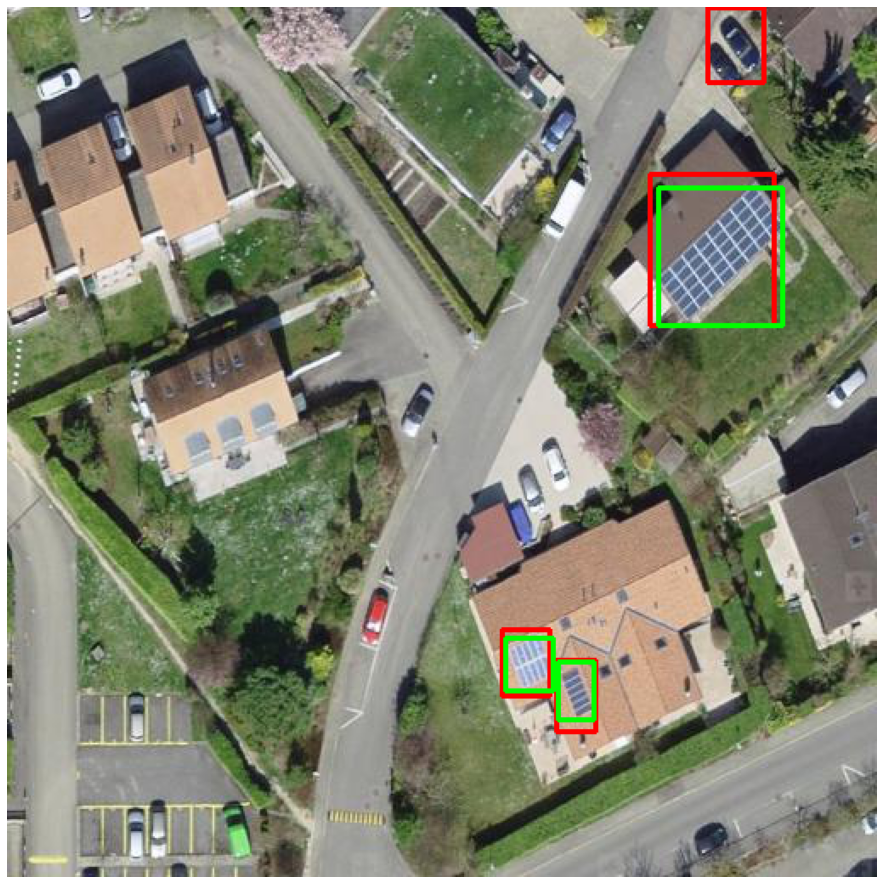

In [ ]:
f = 20
img_pred = io.imread(os.path.join(path_to_images_resize,list_of_preds[f]))
detec = preds[preds['file_name'] == list_of_preds[f]]
for i, row in detec.iterrows():
  color = (255,0,0)
  cv2.rectangle(img_pred, (max(0, row['xmin']), max(0, row['ymin']) , max(0, row['xmax'] - row['xmin']), max(0, row['ymax'] - row['ymin'])), color, 2)
true_sample = new_xml_df[new_xml_df['file_name'] == list_of_preds[f]]
for j, row_2 in true_sample.iterrows():
  color = (0,255,0)
  cv2.rectangle(img_pred, (max(0, row_2['xmin']), max(0, row_2['ymin']) , max(0, row_2['xmax'] - row_2['xmin']), max(0, row_2['ymax'] - row_2['ymin'])), color, 2)

plt.figure(figsize=(16,16))
plt.imshow(img_pred)
plt.axis('off')
plt.show()